In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import pandas as pd
import seaborn as sns
import time
import gc
import os
import sys

from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

sys.path.append(os.path.abspath('../Data'))

import queries

## Get Data


In [5]:
server = 'VT3'
schema = 'WCS01600'
features = queries.get_profit_by_market_type_by_month(server, schema)
features.head()

TYEAR  TMON         211         291          221          111       504  \
0  2016.0   1.0  450582.720  110735.785   958278.551  222942.4150  21997.82   
1  2016.0   2.0  492019.306  118595.320  1143009.715  233976.3061  23006.30   
2  2016.0   3.0  622913.275  147974.604  1185105.009  307457.6707  23784.29   
3  2016.0   4.0  600119.291  144490.585  1250251.937  273326.5894  16803.92   
4  2016.0   5.0  696140.690  174991.097  1681822.501  296481.0199  21251.60   

          215         117         253  ...       300  542  193  475     254  \
0  483085.179  42992.4007   8120.2760  ...  7390.260  0.0  0.0  0.0  191.35   
1  506827.830  41077.1858   9443.8120  ... -1424.710  0.0  0.0  0.0   23.50   
2  671013.256  51151.3075  12438.6915  ...  -534.595  0.0  0.0  0.0    0.00   
3  586653.304  47298.2769  12707.7130  ...  -257.970  0.0  0.0  0.0   65.30   
4  772874.168  42399.9050  28898.1485  ...   -41.165  0.0  0.0  0.0   99.25   

        113  566  544  000   558  
0  1468.858  0.0  0.0  0.0   0.0  
1  1366.770  0.0  0.0  0.0  62.2  
2  1928.929  0.0  0.0  0.0   0.0  
3  1507.169  0.0  0.0  0.0   0.0  
4  1564.869  0.0  0.0  0.0   0.0  

[5 rows x 49 columns]

array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],


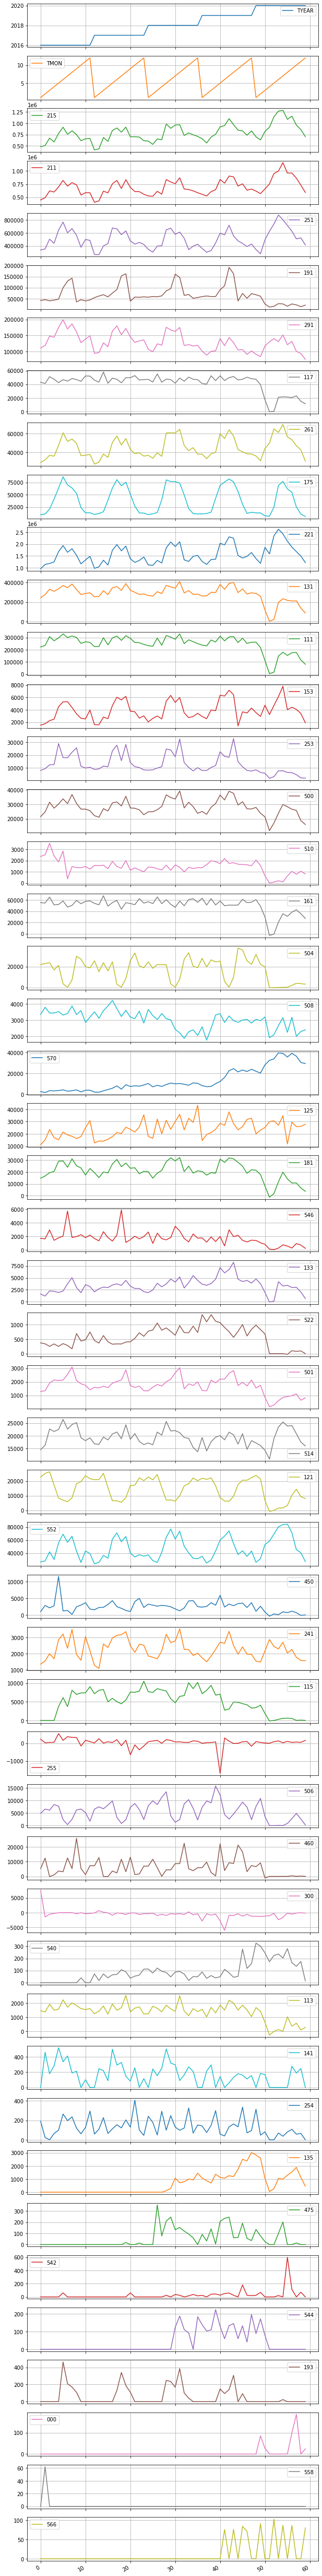

In [17]:
features.plot(subplots=True, grid=True, layout=(49, 1), figsize=(10, 100))


## Feature Importance


array([[<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],
       [<AxesSubplot:>],


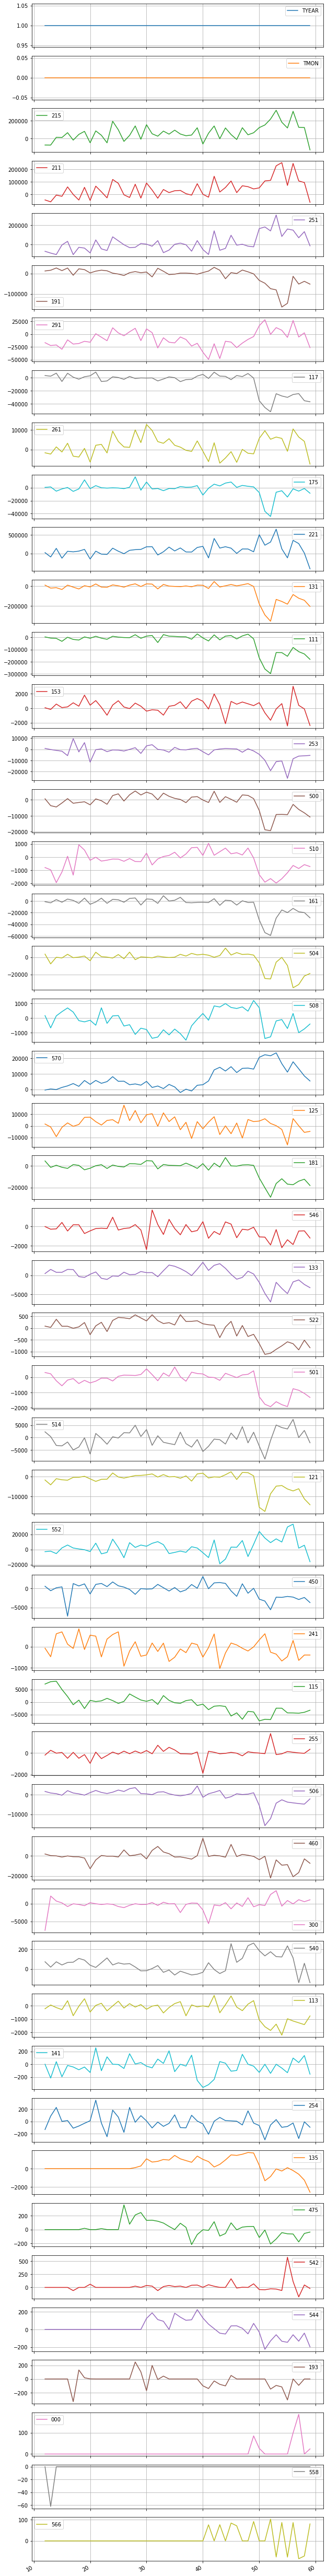

In [39]:
# Remove seasonality to make dataset stationary
# Done to explore other systematic signals
differenced = features.diff(12)[12:]
differenced.plot(subplots=True, grid=True, layout=(49, 1), figsize=(10, 100))

C:\Users\Luke.Beatty\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:672: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\Luke.Beatty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


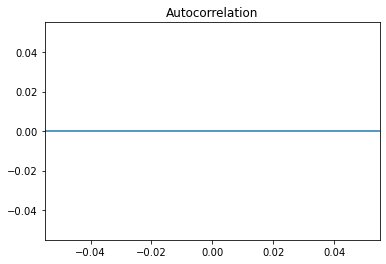

C:\Users\Luke.Beatty\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:672: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
C:\Users\Luke.Beatty\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


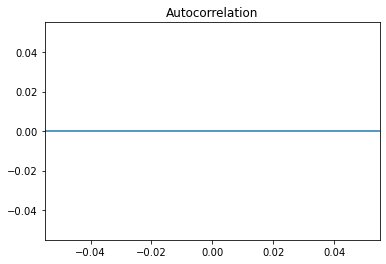

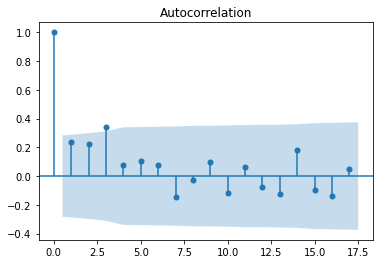

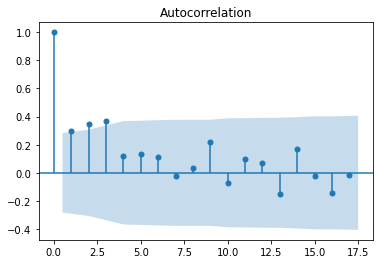

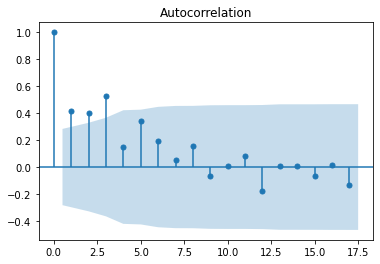

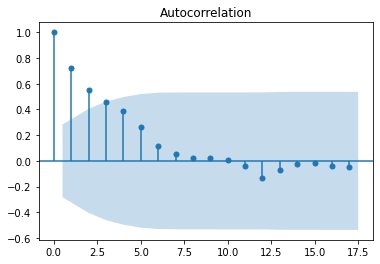

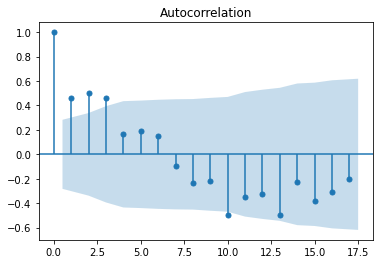

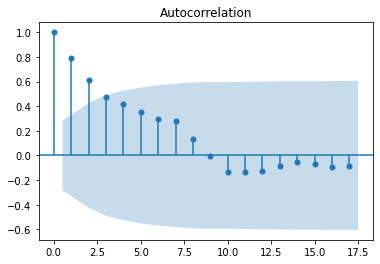

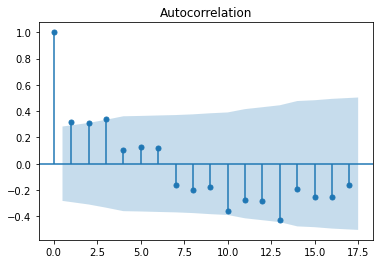

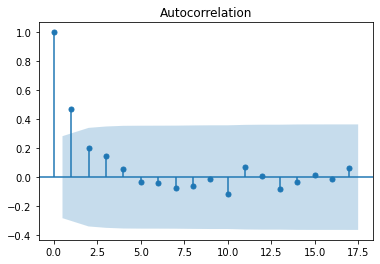

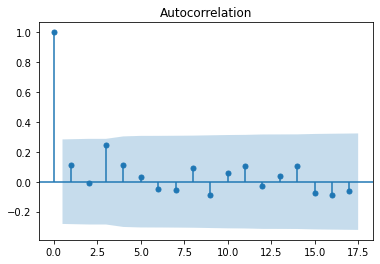

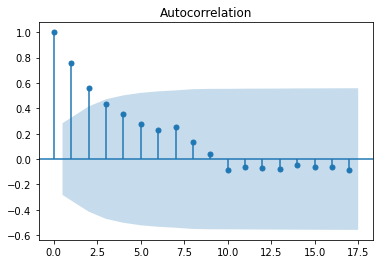

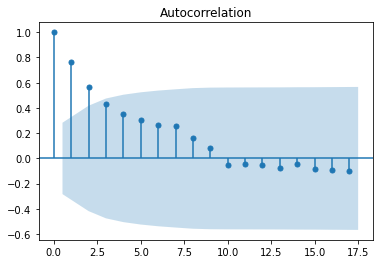

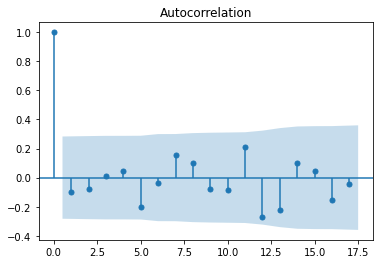

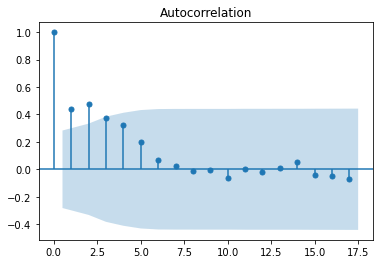

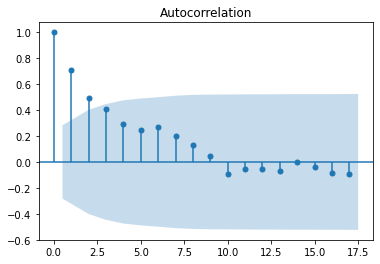

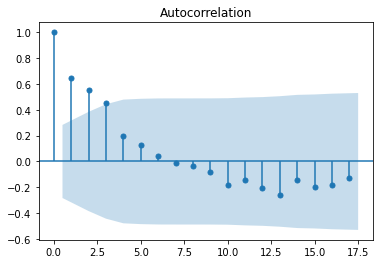

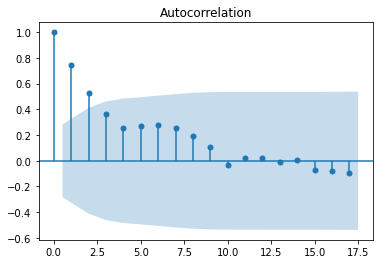

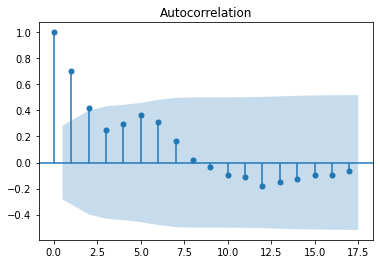

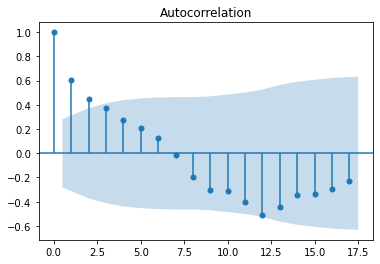

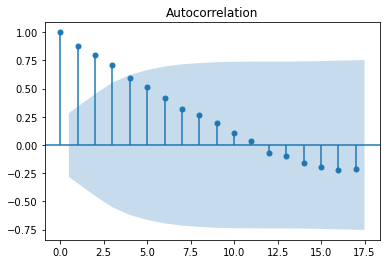

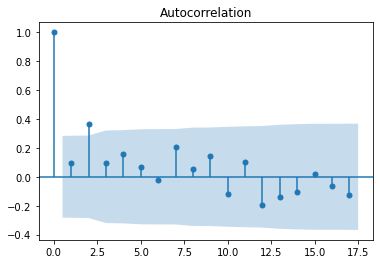

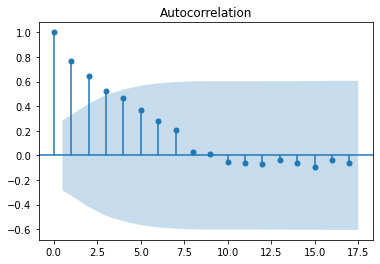

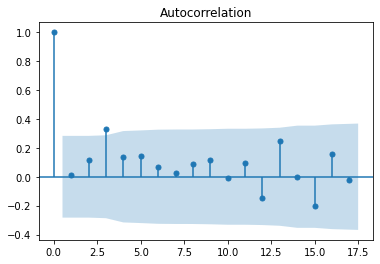

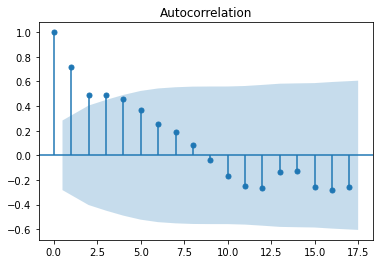

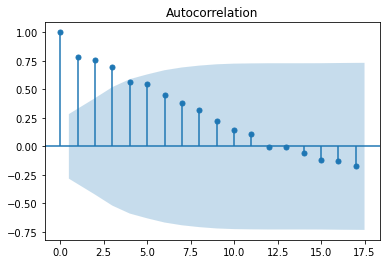

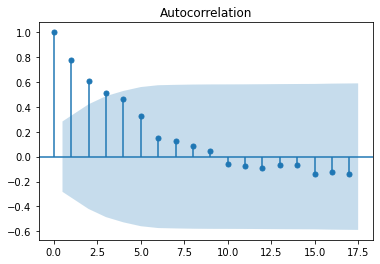

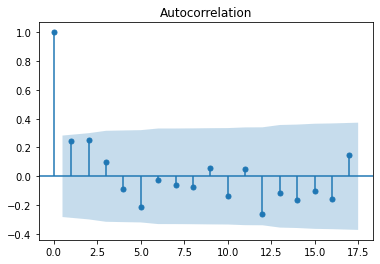

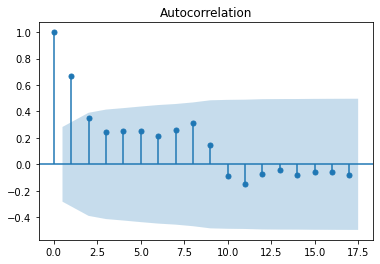

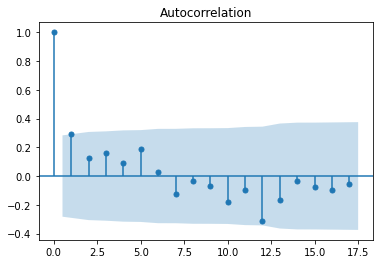

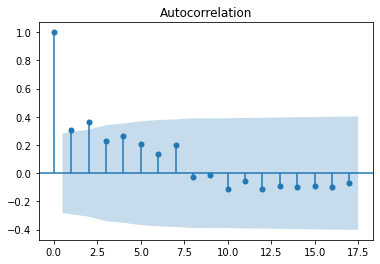

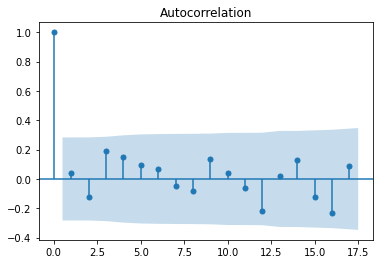

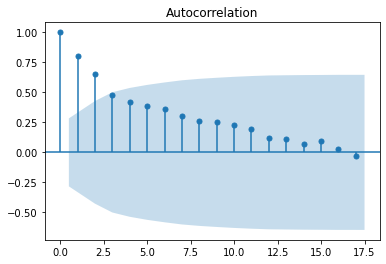

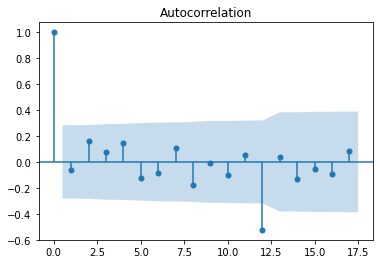

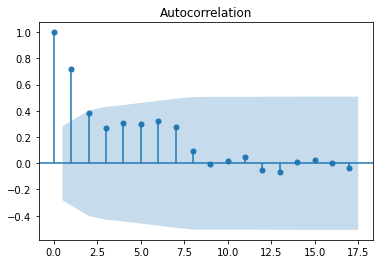

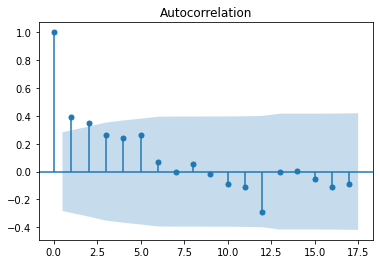

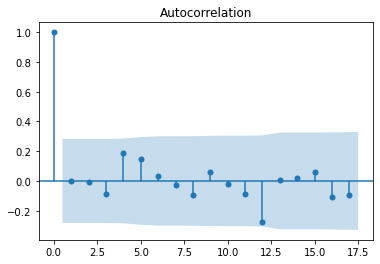

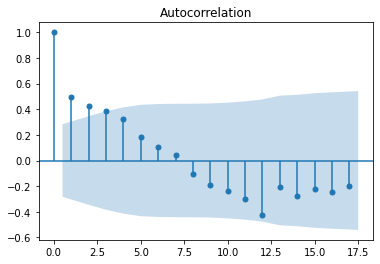

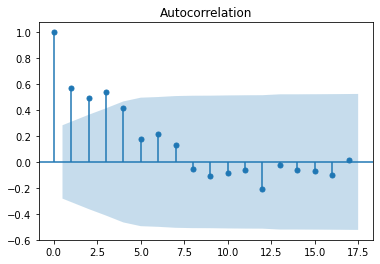

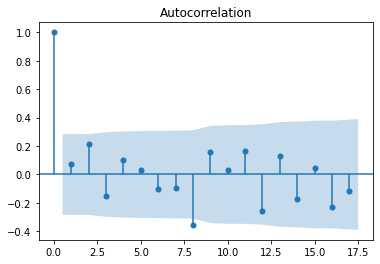

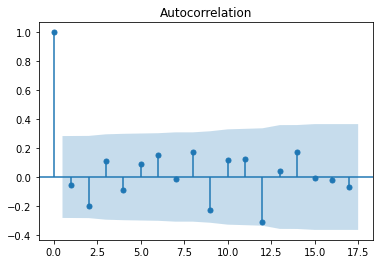

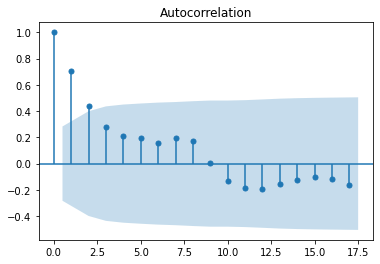

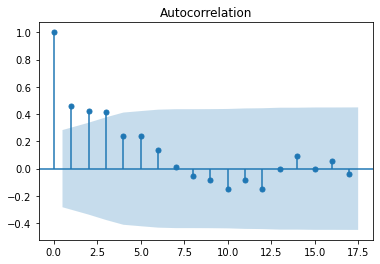

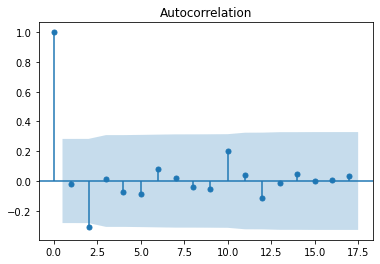

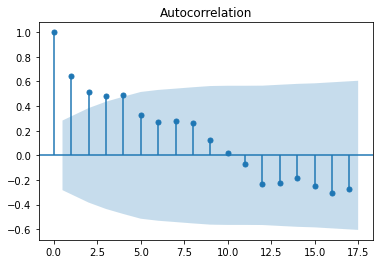

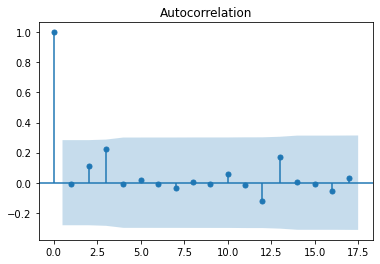

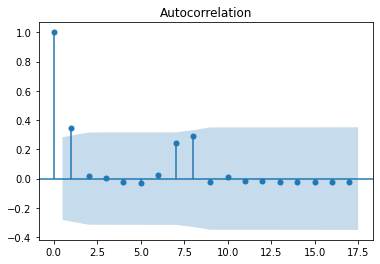

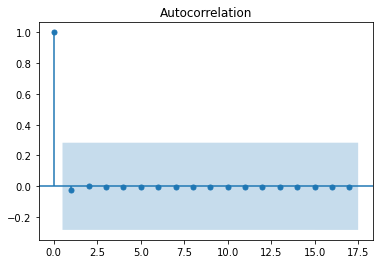

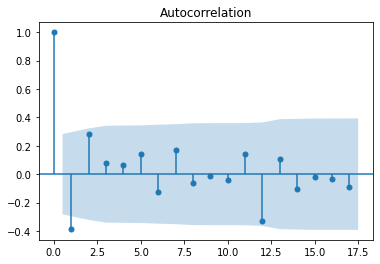

In [40]:
# Autocorrelation plotting (correlogram)
for var in differenced.columns:
    plot_acf(differenced[var])
    plt.show()

In [78]:
# Creating columns of shifted observations (lag values)
cols = differenced.columns.delete([0,1])
lags = range(12, 0, -1)

differenced_lag = differenced.assign(**{
    '{} (t-{})'.format(col, t): differenced[col].shift(t)
    for t in lags
    for col in cols
})[13:]

print(differenced_lag.head())

    TYEAR  TMON          215         211         251        191         291  \
25    1.0   0.0   98977.6330  88555.4020  38991.0870 -2207.7868   2531.0360   
26    1.0   0.0  -31721.7710  -3580.9390  -1928.5570 -9384.5054  -3016.5790   
27    1.0   0.0   35940.3190 -25095.3510 -32096.7300  4516.5399   4748.2760   
28    1.0   0.0  142340.6510  81257.7210 -28797.4660  9742.6297  11584.9000   
29    1.0   0.0   -7394.6184 -29679.5971  10775.8867  4383.3287 -12575.1338   

          117         261         175  ...  141 (t-1)  254 (t-1)  135 (t-1)  \
25   123.3086   4099.5010   -633.2465  ...      0.000     183.38       0.00   
26 -2684.2464   1313.4970  -1583.5023  ...     -3.778      69.53       0.00   
27  1690.6571   1084.6180    545.8726  ...    -65.998    -178.44       0.00   
28 -1387.0572  10056.6130  16599.1084  ...    164.300     227.79       0.00   
29  -504.6618   3541.3893  -3951.3970  ...      3.636     -14.15     113.26   

    475 (t-1)  542 (t-1)  544 (t-1)  193 (t-1)  00

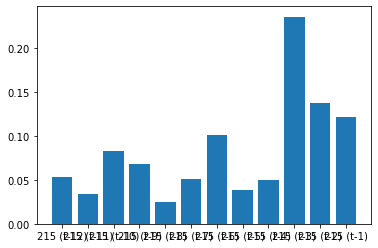

<Figure size 2880x4320 with 0 Axes>

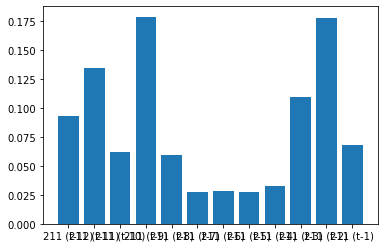

<Figure size 2880x4320 with 0 Axes>

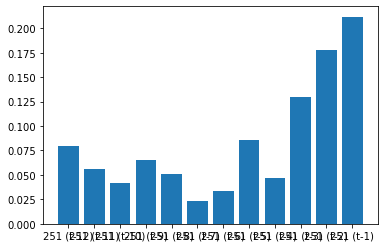

<Figure size 2880x4320 with 0 Axes>

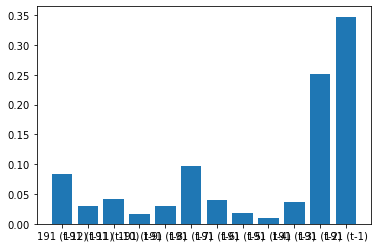

<Figure size 2880x4320 with 0 Axes>

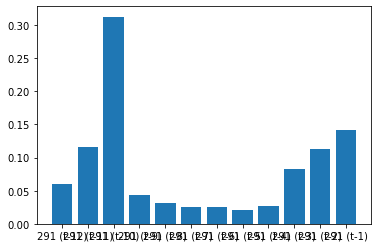

<Figure size 2880x4320 with 0 Axes>

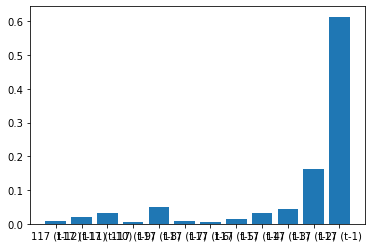

<Figure size 2880x4320 with 0 Axes>

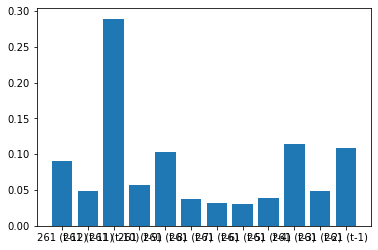

<Figure size 2880x4320 with 0 Axes>

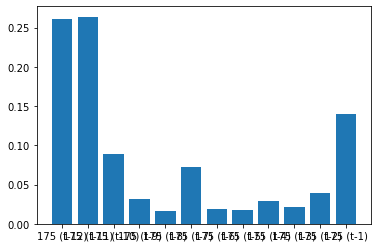

<Figure size 2880x4320 with 0 Axes>

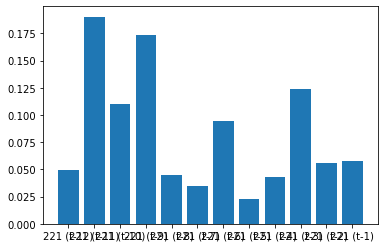

<Figure size 2880x4320 with 0 Axes>

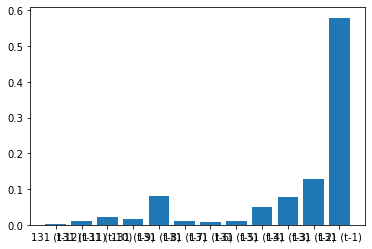

<Figure size 2880x4320 with 0 Axes>

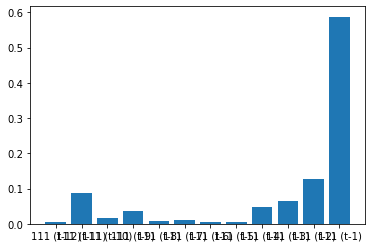

<Figure size 2880x4320 with 0 Axes>

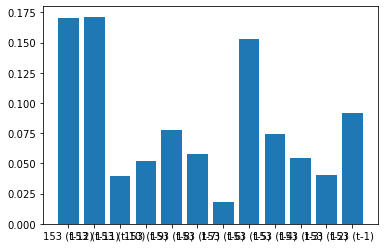

<Figure size 2880x4320 with 0 Axes>

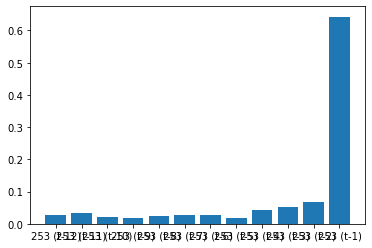

<Figure size 2880x4320 with 0 Axes>

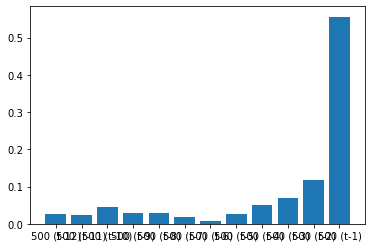

<Figure size 2880x4320 with 0 Axes>

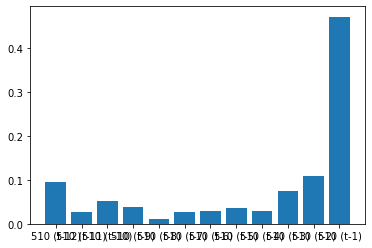

<Figure size 2880x4320 with 0 Axes>

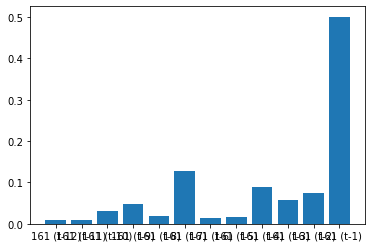

<Figure size 2880x4320 with 0 Axes>

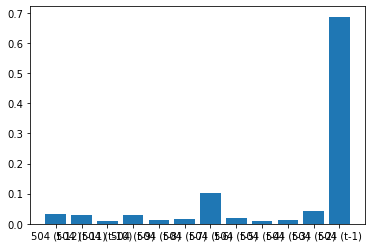

<Figure size 2880x4320 with 0 Axes>

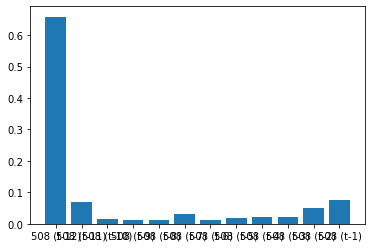

<Figure size 2880x4320 with 0 Axes>

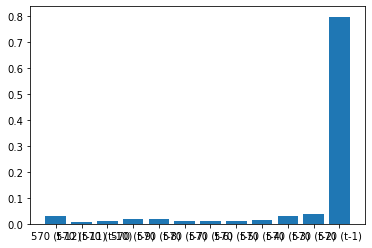

<Figure size 2880x4320 with 0 Axes>

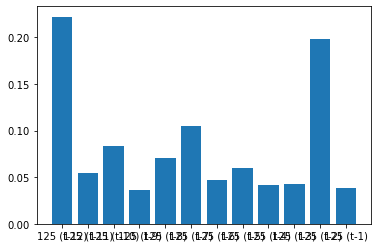

<Figure size 2880x4320 with 0 Axes>

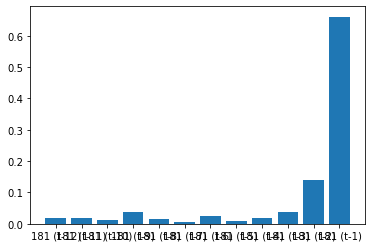

<Figure size 2880x4320 with 0 Axes>

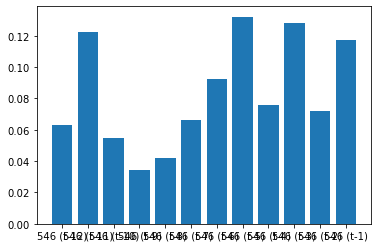

<Figure size 2880x4320 with 0 Axes>

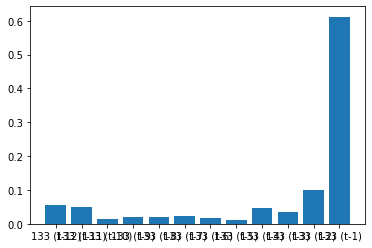

<Figure size 2880x4320 with 0 Axes>

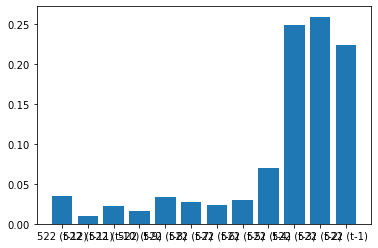

<Figure size 2880x4320 with 0 Axes>

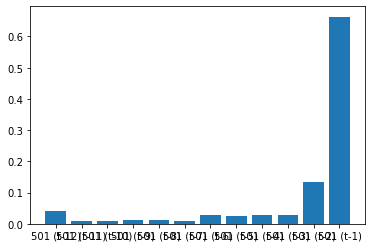

<Figure size 2880x4320 with 0 Axes>

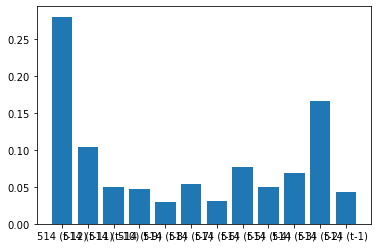

<Figure size 2880x4320 with 0 Axes>

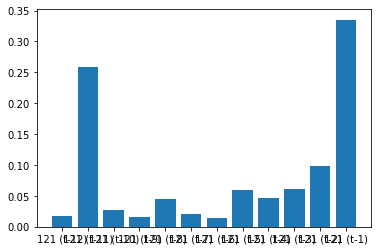

<Figure size 2880x4320 with 0 Axes>

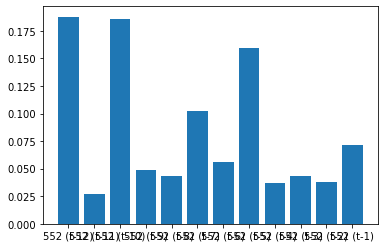

<Figure size 2880x4320 with 0 Axes>

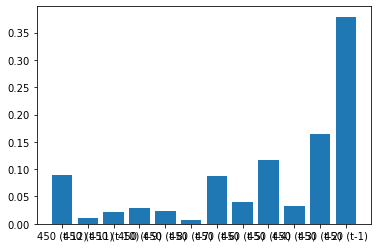

<Figure size 2880x4320 with 0 Axes>

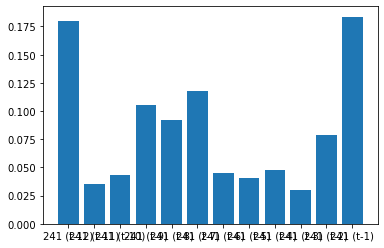

<Figure size 2880x4320 with 0 Axes>

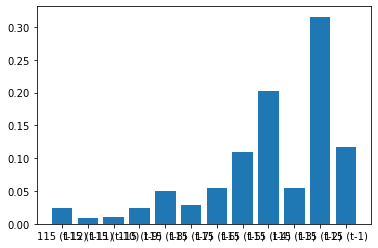

<Figure size 2880x4320 with 0 Axes>

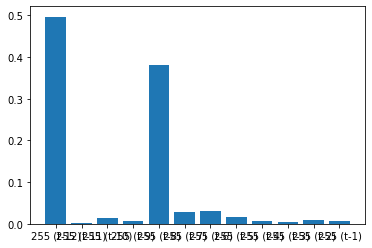

<Figure size 2880x4320 with 0 Axes>

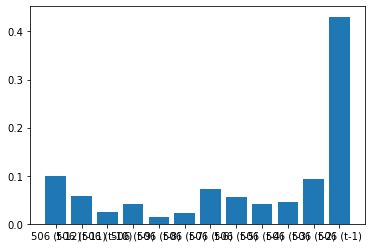

<Figure size 2880x4320 with 0 Axes>

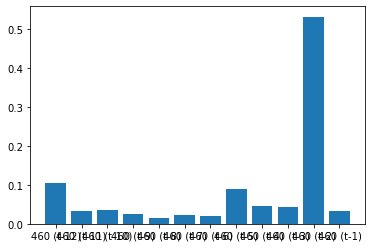

<Figure size 2880x4320 with 0 Axes>

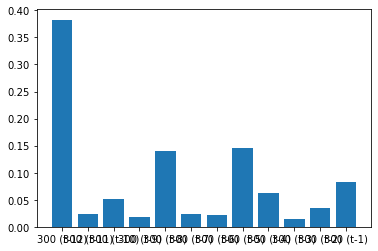

<Figure size 2880x4320 with 0 Axes>

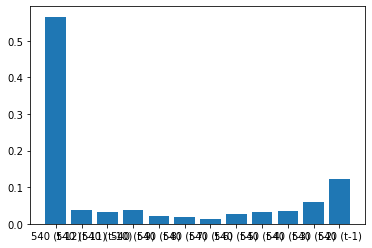

<Figure size 2880x4320 with 0 Axes>

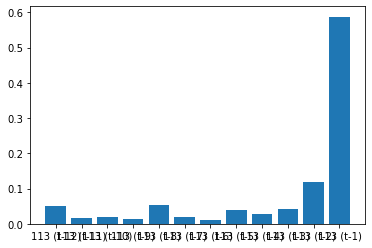

<Figure size 2880x4320 with 0 Axes>

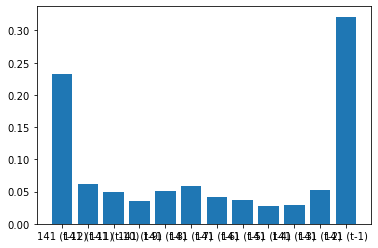

<Figure size 2880x4320 with 0 Axes>

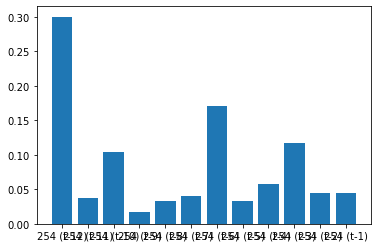

<Figure size 2880x4320 with 0 Axes>

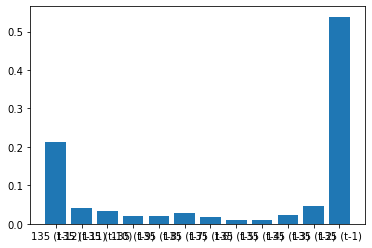

<Figure size 2880x4320 with 0 Axes>

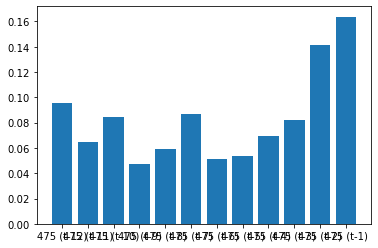

<Figure size 2880x4320 with 0 Axes>

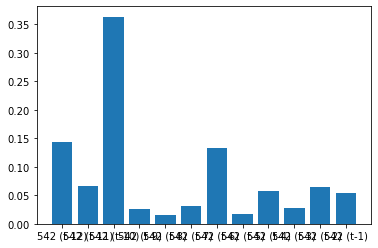

<Figure size 2880x4320 with 0 Axes>

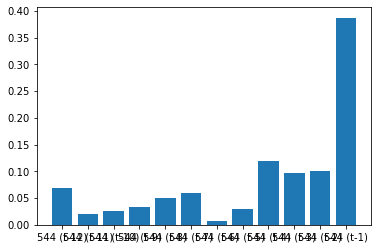

<Figure size 2880x4320 with 0 Axes>

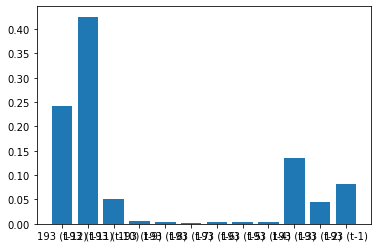

<Figure size 2880x4320 with 0 Axes>

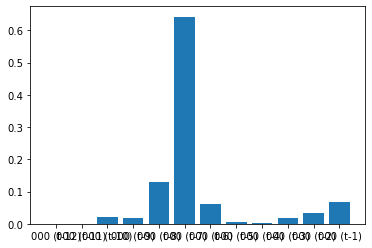

<Figure size 2880x4320 with 0 Axes>

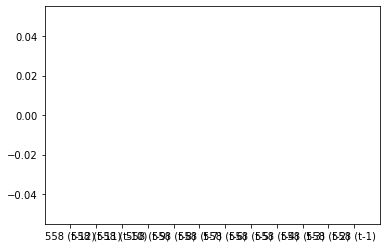

<Figure size 2880x4320 with 0 Axes>

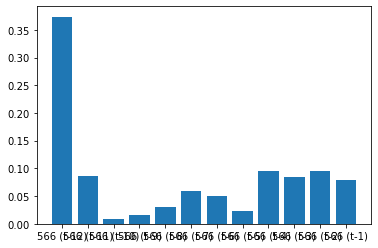

<Figure size 2880x4320 with 0 Axes>

In [113]:
# Feature importance score for each feature and subsequent lagged features
model = RandomForestRegressor(n_estimators=500, random_state=1)

for col in cols:
    X = differenced_lag.filter(regex = rf"{col}.*-.*")
    Y = differenced_lag.filter(regex = rf"{col}((?!-).)*$")

    model.fit(X, np.ravel(Y))
    names = X.columns
    ticks = [i for i in range(len(names))]
    plt.bar(ticks, model.feature_importances_)
    plt.xticks(ticks, names)
    plt.figure(figsize=(40, 60))
    plt.show()

